In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('data/vehicles_dataset_upd5.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,...,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,std_scaler_odometer,std_scaler_price
0,0,0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,...,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,1,1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,...,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,2,2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,...,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,3,3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,...,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,4,4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,...,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


In [17]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [18]:
std_scaler.fit(df[['odometer', 'price']])

StandardScaler()

In [19]:
print(std_scaler.mean_) # среднее
print(std_scaler.var_) # дисперсия

[95166.42894272 18014.65277056]
[3.93671714e+09 1.56199217e+08]


In [20]:
std_scaled = std_scaler.transform(df[['odometer', 'price']])
std_scaled

array([[-1.07938964,  2.95850859],
       [-0.56011477, -0.08582617],
       [-1.29286276,  1.40625632],
       ...,
       [ 0.87686817, -0.72168951],
       [-0.52951388,  1.11100834],
       [-0.94425163,  1.11820951]])

In [21]:
std_scaler_odometer = std_scaler.transform(df[['odometer', 'price']])

In [22]:
df[['std_scaler_odometer', 'std_scaler_price']] = std_scaled

In [23]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,...,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,std_scaler_odometer,std_scaler_price
0,0,0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,...,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,1,1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,...,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,2,2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,...,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,3,3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,...,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,4,4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,...,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


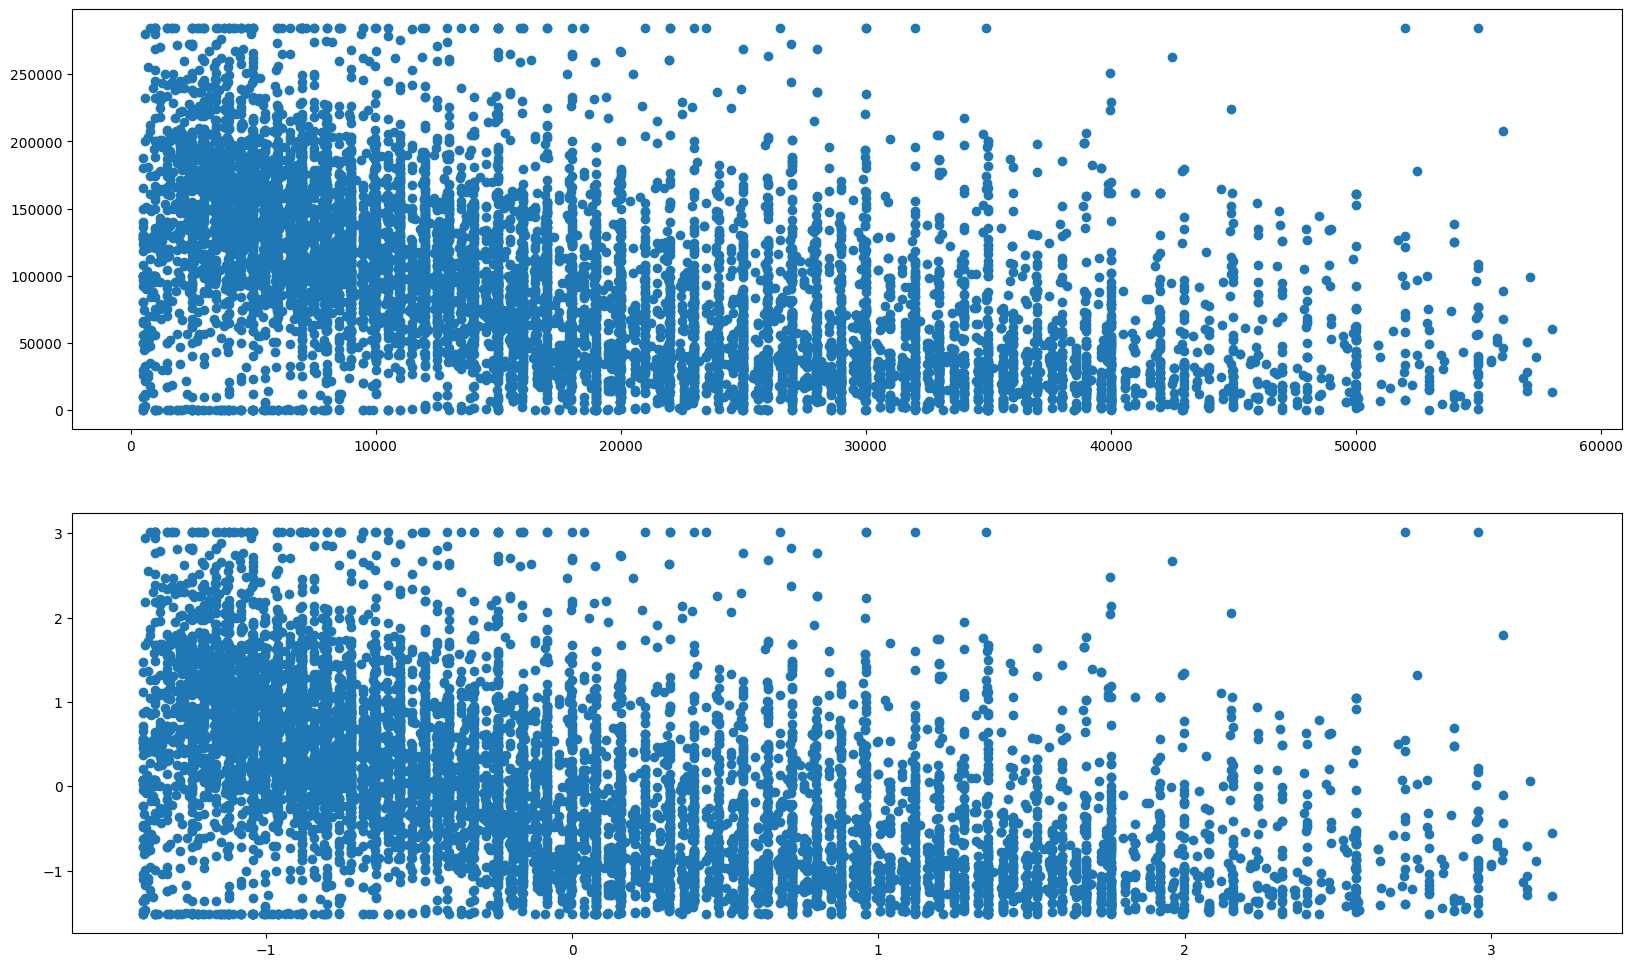

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.scatter(df.price, df.odometer)

ax2.scatter(df.std_scaler_price, df.std_scaler_odometer);

In [25]:
std_scaler.transform([[50000, 30000]])

C:\Users\Professional\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.71986101,  0.95898363]])

In [26]:
df.to_csv('data/vehicles_dataset_upd6.csv')